<a href="https://colab.research.google.com/github/stemgene/Prediction-of-Skilled-Nursing-Facility-SNF-for-recovery/blob/master/2.Tuning%20hyperparameters%20for%20Random%20Forest%20and%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import datetime
import numpy as np
import pandas as pd
import re
import random
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

## Training by classification models with given data

In [0]:
df_train = pd.read_csv("snf_train.csv", header=0)
df_valid = pd.read_csv("snf_valid.csv", header=0)
df_test = pd.read_csv("snf_test.csv", header=0)
# Seprate X and y
X_train = df_train.drop(["SNF"], axis=1)
y_train = df_train['SNF']
X_valid = df_valid.drop(["SNF"], axis=1)
y_valid = df_valid['SNF']
X_test = df_test.drop(["SNF"], axis=1)
y_test = df_test['SNF']

In [0]:
# Logistic Regression
logreg = LogisticRegression(C=1e5, solver='liblinear', multi_class='ovr')
logreg_model = logreg.fit(X_train, y_train)
y_lr_pred = logreg_model.predict(X_test)


# SVM
# Ploynomial kernel
svclassifier_ploy = SVC(kernel='poly',degree=8)
svclassifier_ploy.fit(X_train, y_train)
# Gaussian Kernel
svclassifier_rbf = SVC(kernel='rbf')
svclassifier_rbf.fit(X_train, y_train)
# Sigmoid Kernel
svclassifier_sig = SVC(kernel='sigmoid')
svclassifier_sig.fit(X_train, y_train)
# Doin predictions
y_ploy_pred = svclassifier_ploy.predict(X_test)
y_rbf_pred = svclassifier_rbf.predict(X_test)
y_sig_pred = svclassifier_sig.predict(X_test)

# Decision Tree
dtc = DecisionTreeClassifier() 
dtc.fit(X_train, y_train)
y_dt_pred = dtc.predict(X_test)

# Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Futu

In [0]:
# Logistic Regression
print("The Logistic Regression accuracy classification score is", round(logreg_model.score(X_test, y_test),3))
print(confusion_matrix(y_test, y_lr_pred))
print(classification_report(y_test, y_lr_pred))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_pred)

# SVM
s_ploy = round(svclassifier_ploy.score(X_test, y_test), 3)
s_rbf = round(svclassifier_rbf.score(X_test, y_test), 3)
s_sig = round(svclassifier_sig.score(X_test, y_test), 3)
c_ploy = confusion_matrix(y_test, y_ploy_pred)
c_rbf = confusion_matrix(y_test, y_rbf_pred)
c_sig = confusion_matrix(y_test, y_sig_pred)
cr_ploy = classification_report(y_test, y_ploy_pred)
cr_rbf = classification_report(y_test, y_rbf_pred)
cr_sig = classification_report(y_test, y_sig_pred)
print("The SVM accuracy score of different kernals are :\nPloynomial kernel {0}\n \
Gaussian Kernel: {1}\nSigmoid Kernel: {2}".format(s_ploy, s_rbf, s_sig))
print("The SVM confusion_matrix are:\nPloynomial kernel\n{0}\n \
Gaussian Kernel:\n{1}\n Sigmoid Kernel:\n{2}".format(c_ploy, c_rbf, c_sig))
print("The SVM classification reports are:\nPloynomial kernel\n{0}\n \
Gaussian Kernel:\n{1}\n Sigmoid Kernel:\n{2}".format(cr_ploy, cr_rbf, cr_sig))
fpr_svm_ploy, tpr_svm_ploy, _ = roc_curve(y_test, y_ploy_pred)
fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, y_rbf_pred)
fpr_svm_sig, tpr_svm_sig, _ = roc_curve(y_test, y_sig_pred)

#Decision Tree
print("The Decision Tree accuracy classification score is", round(dtc.score(X_test, y_test),3))
print(confusion_matrix(y_test, y_dt_pred))
print(classification_report(y_test, y_dt_pred, target_names=["0", "1"]))
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_dt_pred)

# Random Forest
print("The Random Forest accuracy classification score is", round(rfc.score(X_test, y_test),3))
print(confusion_matrix(y_test, y_rfc_pred))
print(classification_report(y_test, y_rfc_pred, target_names=["0", "1"]))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rfc_pred)

The Logistic Regression accuracy classification score is 0.864
[[163  18]
 [ 30 141]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       181
           1       0.89      0.82      0.85       171

   micro avg       0.86      0.86      0.86       352
   macro avg       0.87      0.86      0.86       352
weighted avg       0.87      0.86      0.86       352

The SVM accuracy score of different kernals are :
Ploynomial kernel 0.812
 Gaussian Kernel: 0.807
Sigmoid Kernel: 0.486
The SVM confusion_matrix are:
Ploynomial kernel
[[152  29]
 [ 37 134]]
 Gaussian Kernel:
[[158  23]
 [ 45 126]]
 Sigmoid Kernel:
[[  0 181]
 [  0 171]]
The SVM classification reports are:
Ploynomial kernel
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       181
           1       0.82      0.78      0.80       171

   micro avg       0.81      0.81      0.81       352
   macro avg       0.81      0.81      0.81

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


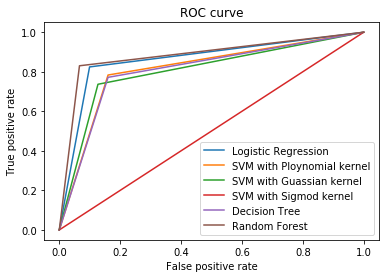

In [0]:
plt.figure()
plt.plot([0,0], [1,1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_svm_ploy, tpr_svm_ploy, label="SVM with Ploynomial kernel")
plt.plot(fpr_svm_rbf, tpr_svm_rbf, label="SVM with Guassian kernel")
plt.plot(fpr_svm_sig, tpr_svm_sig, label="SVM with Sigmod kernel")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc='best')
plt.show()

## Tune Hyperparameters

### SVM

We use GridSearchCV to implement the tuning. Since with different kernels, the parameters are different, we seprate three kernels to two group, those are kernels of linear and Gaussian, and kernel of polynomial.

In [0]:
# Kernels of linear and Gaussian
import time

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'kernel':['linear', 'rbf'], 'C': Cs, 'gamma':gammas}

# for kernels of linear
svc_rbf_lin = SVC()
start = time.time()
gridsearch_rbf_lin = GridSearchCV(svc_rbf_lin, param_grid, cv=10)
gridsearch_rbf_lin.fit(X_train, y_train)
print(gridsearch_rbf_lin.best_estimator_, '\n',gridsearch_rbf_lin.best_score_)
print("It cost", round((time.time()-start),2)) #275s in windows

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 0.8692493946731235
It cost 306.13


In [0]:
param_grid = {'degree': [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]} # degree=1 is linear kernel
svc_poly = SVC(kernel='poly')
start = time.time()
gridsearch_poly = GridSearchCV(svc_poly, param_grid)
gridsearch_poly.fit(X_train, y_train)
print(gridsearch_poly.best_estimator_, '\n',gridsearch_poly.best_score_)
print("It cost", round((time.time()-start),2)) #485s in windows

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) 
 0.8553268765133172
It cost 485.3


In [0]:
# Evaluate poly kernel in validation set
svclassifier_poly = SVC(kernel='poly', degree=2)
svclassifier_poly.fit(X_train, y_train)
# Doin predictions
y_poly_pred = svclassifier_poly.predict(X_valid)
# result
s_poly = round(svclassifier_poly.score(X_valid, y_valid), 3)
c_poly = confusion_matrix(y_valid, y_poly_pred)
cr_poly = classification_report(y_valid, y_poly_pred)
print("When degree=2, the score is {0}, the confusion matrix is \n{1}, the report is\n {2}".format(s_poly, c_poly, cr_poly))

C:\tools\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


When degree=2, the score is 0.861, the confusion matrix is 
[[146  16]
 [ 30 140]], the report is
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       162
           1       0.90      0.82      0.86       170

   micro avg       0.86      0.86      0.86       332
   macro avg       0.86      0.86      0.86       332
weighted avg       0.86      0.86      0.86       332



In [0]:
# Evaluate poly kernel in test set
svclassifier_poly = SVC(kernel='poly', degree=2)
svclassifier_poly.fit(X_train, y_train)
# Doin predictions
y_poly_pred = svclassifier_poly.predict(X_test)
# result
s_poly = round(svclassifier_poly.score(X_test, y_test), 3)
c_poly = confusion_matrix(y_test, y_poly_pred)
cr_poly = classification_report(y_test, y_poly_pred)
print("When degree=2, the score is {0}, the confusion matrix is \n{1}, the report is\n {2}".format(s_poly, c_poly, cr_poly))

C:\tools\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


When degree=2, the score is 0.875, the confusion matrix is 
[[165  16]
 [ 28 143]], the report is
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       181
           1       0.90      0.84      0.87       171

   micro avg       0.88      0.88      0.88       352
   macro avg       0.88      0.87      0.87       352
weighted avg       0.88      0.88      0.87       352



In [0]:
gridsearch_rbf_lin.cv_results_

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: Fu

{'mean_fit_time': array([0.0736382 , 0.0658354 , 0.06766661, 0.065792  , 0.06583254,
        0.06640848, 0.0658257 , 0.06582435, 0.06547999, 0.06549033,
        0.06881595, 0.06902107, 0.06882556, 0.06874998, 0.06915895,
        0.06849329, 0.06869809, 0.06915426, 0.06881714, 0.06813033]),
 'std_fit_time': array([4.93238519e-03, 2.14391906e-03, 8.36295761e-04, 2.47405965e-03,
        2.14633454e-03, 2.51145938e-03, 1.41040247e-03, 2.15402018e-03,
        1.70683314e-03, 1.69451579e-03, 8.14004070e-04, 5.88771043e-04,
        1.41309807e-05, 7.11008851e-04, 4.63806619e-04, 4.76148519e-04,
        6.49578243e-04, 9.41564263e-04, 8.17216700e-04, 5.06946053e-04]),
 'mean_score_time': array([0.021463  , 0.01994665, 0.01994387, 0.02597117, 0.02027957,
        0.018653  , 0.02061041, 0.01994689, 0.02027806, 0.01994705,
        0.01698295, 0.01761977, 0.01795244, 0.0179526 , 0.01762287,
        0.01795268, 0.01464836, 0.01795014, 0.01795109, 0.0182964 ]),
 'std_score_time': array([1.49242345e-

c=10, gamma =0.001
c=10, gamma = 0.01
c=1, gamma=0.01
c is larger, tends to overfitting, try to c = [1, 10], gamma [0.001, 0.01]

for polynomial kernel, use degree as parameter, when degree=2, score in training set is 0.8553, in validation set is 0.861, worse than linear kernel. drop this kernel.

Second round of linear kernel

In [0]:
import time
Cs = [x for x in np.linspace(start = 1, stop = 10, num = 10)]
gammas = [x for x in np.linspace(start = 0.001, stop = 0.01, num = 10)]
param_grid = {'kernel':['linear'], 'C': Cs, 'gamma':gammas}

# for kernels of linear
svc_rbf_lin = SVC()
start = time.time()
gridsearch_rbf_lin = GridSearchCV(svc_rbf_lin, param_grid)
gridsearch_rbf_lin.fit(X_train, y_train)
print(gridsearch_rbf_lin.best_estimator_, '\n',gridsearch_rbf_lin.best_score_)
print("It cost", round((time.time()-start),2)) #275s in windows

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


SVC(C=9.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 0.862590799031477
It cost 227.98


second round results: C = 9, any gamma, acc=0.8626; c=8,10, any gamma acc=0.8620
C = 1,7, any gamma, acc=0.8608


Evaluate whether overfitting in C=9

In [0]:
# Evaluate in validation set
Cs = [1, 9]
for c in Cs:
    svclassifier_lin = SVC(kernel='linear', C=c, gamma='scale')
    svclassifier_lin.fit(X_train, y_train)
    # Doin predictions
    y_lin_pred = svclassifier_lin.predict(X_valid)
    # result
    print("\nWhen C=", c,'\n')
    s_lin = round(svclassifier_lin.score(X_valid, y_valid), 3)
    c_lin = confusion_matrix(y_valid, y_lin_pred)
    cr_lin = classification_report(y_valid, y_lin_pred)
    print("When c={0}, the score is {1}, the confusion matrix is \n{2}, the report is\n {3}".format(c, s_lin, c_lin, cr_lin))


When C= 1 

When c=1, the score is 0.873, the confusion matrix is 
[[146  16]
 [ 26 144]], the report is
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       162
           1       0.90      0.85      0.87       170

   micro avg       0.87      0.87      0.87       332
   macro avg       0.87      0.87      0.87       332
weighted avg       0.88      0.87      0.87       332


When C= 9 

When c=9, the score is 0.867, the confusion matrix is 
[[145  17]
 [ 27 143]], the report is
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       162
           1       0.89      0.84      0.87       170

   micro avg       0.87      0.87      0.87       332
   macro avg       0.87      0.87      0.87       332
weighted avg       0.87      0.87      0.87       332



When c=1, score is 0.873, when c =9, the score is 0.867. choose c=1

Third round

In [0]:
import time
Cs = [x for x in np.linspace(start = 0.05, stop = 2, num = 25)]
gammas = [x for x in np.linspace(start = 0.001, stop = 0.01, num = 10)]
param_grid = {'kernel':['linear'], 'C': Cs, 'gamma':gammas}

# for kernels of linear
svc_rbf_lin = SVC()
start = time.time()
gridsearch_rbf_lin = GridSearchCV(svc_rbf_lin, param_grid)
gridsearch_rbf_lin.fit(X_train, y_train)
print(gridsearch_rbf_lin.best_estimator_, '\n',gridsearch_rbf_lin.best_score_)
print("It cost", round((time.time()-start),2)) # 130s

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 0.8686440677966102
It cost 129.93


In [0]:
# Evaluate in validation set
Cs = [0.1, 1.7, 1.8]
for c in Cs:
    svclassifier_lin = SVC(kernel='linear', C=c, gamma='scale')
    svclassifier_lin.fit(X_train, y_train)
    # Doin predictions
    y_lin_pred = svclassifier_lin.predict(X_valid)
    # result
    print("\nWhen C=", c,'\n')
    s_lin = round(svclassifier_lin.score(X_valid, y_valid), 3)
    c_lin = confusion_matrix(y_valid, y_lin_pred)
    cr_lin = classification_report(y_valid, y_lin_pred)
    print("When c={0}, the score is {1}, the confusion matrix is \n{2}, the report is\n {3}".format(c, s_lin, c_lin, cr_lin))


When C= 0.1 

When c=0.1, the score is 0.88, the confusion matrix is 
[[148  14]
 [ 26 144]], the report is
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       162
           1       0.91      0.85      0.88       170

   micro avg       0.88      0.88      0.88       332
   macro avg       0.88      0.88      0.88       332
weighted avg       0.88      0.88      0.88       332


When C= 1.7 

When c=1.7, the score is 0.867, the confusion matrix is 
[[144  18]
 [ 26 144]], the report is
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       162
           1       0.89      0.85      0.87       170

   micro avg       0.87      0.87      0.87       332
   macro avg       0.87      0.87      0.87       332
weighted avg       0.87      0.87      0.87       332


When C= 1.8 

When c=1.8, the score is 0.864, the confusion matrix is 
[[144  18]
 [ 27 143]], the report is
               

third round evaluation in validation :When c=0.1, score is 0.88, when c =1.7, the score is 0.867, when c =1., the score is 0.864. choose c=0.1.

Since best c from 1 to 0.1, we have to make the fourth hone in.

fourth round c=[0.05, 0.2], gamma=’scaled’


In [0]:
import time
Cs = [x for x in np.linspace(start = 0.05, stop = 0.2, num = 16)]
gammas = [x for x in np.linspace(start = 0.001, stop = 0.01, num = 10)]
param_grid = {'kernel':['linear'], 'C': Cs, 'gamma':gammas}

# for kernels of linear
svc_rbf_lin = SVC()
start = time.time()
gridsearch_rbf_lin = GridSearchCV(svc_rbf_lin, param_grid)
gridsearch_rbf_lin.fit(X_train, y_train)
print(gridsearch_rbf_lin.best_estimator_, '\n',gridsearch_rbf_lin.best_score_)
print("It cost", round((time.time()-start),2))

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 0.8704600484261501
It cost 59.97


In [0]:
# Evaluate in validation set
Cs = [0.05, 0.08, 0.11, 0.13]
for c in Cs:
    svclassifier_lin = SVC(kernel='linear', C=c, gamma='scale')
    svclassifier_lin.fit(X_train, y_train)
    # Doin predictions
    y_lin_pred = svclassifier_lin.predict(X_valid)
    # result
    print("\nWhen C=", c,'\n')
    s_lin = round(svclassifier_lin.score(X_valid, y_valid), 3)
    c_lin = confusion_matrix(y_valid, y_lin_pred)
    cr_lin = classification_report(y_valid, y_lin_pred)
    print("When c={0}, the score is {1}, the confusion matrix is \n{2}, the report is\n {3}".format(c, s_lin, c_lin, cr_lin))


When C= 0.05 

When c=0.05, the score is 0.88, the confusion matrix is 
[[149  13]
 [ 27 143]], the report is
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       162
           1       0.92      0.84      0.88       170

   micro avg       0.88      0.88      0.88       332
   macro avg       0.88      0.88      0.88       332
weighted avg       0.88      0.88      0.88       332


When C= 0.08 

When c=0.08, the score is 0.877, the confusion matrix is 
[[148  14]
 [ 27 143]], the report is
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       162
           1       0.91      0.84      0.87       170

   micro avg       0.88      0.88      0.88       332
   macro avg       0.88      0.88      0.88       332
weighted avg       0.88      0.88      0.88       332


When C= 0.11 

When c=0.11, the score is 0.88, the confusion matrix is 
[[148  14]
 [ 26 144]], the report is
          

fourth round evaluation in validation

When c=0.05 and 0.11, the score is 0.88, when c =0.08 and 0.13, the score is 0.877

Choose 0.11 sent to test set

In [0]:
# Evaluate linear kernel in test set
svclassifier_lin = SVC(kernel='linear')
svclassifier_lin.fit(X_train, y_train)
# Doin predictions
y_lin_pred = svclassifier_lin.predict(X_test)
# result
s_lin = round(svclassifier_lin.score(X_test, y_test), 3)
c_lin = confusion_matrix(y_test, y_lin_pred)
cr_lin = classification_report(y_test, y_lin_pred)
print("the score is {0}, the confusion matrix is \n{1}, the report is\n {2}".format(s_lin, c_lin, cr_lin))

the score is 0.872, the confusion matrix is 
[[163  18]
 [ 27 144]], the report is
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       181
           1       0.89      0.84      0.86       171

   micro avg       0.87      0.87      0.87       352
   macro avg       0.87      0.87      0.87       352
weighted avg       0.87      0.87      0.87       352



### Random Forest

default parameter on validation set

In [0]:
# Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_test)
print("The Random Forest accuracy classification score is", round(rfc.score(X_test, y_test),3))
print(confusion_matrix(y_test, y_rfc_pred))
print(classification_report(y_test, y_rfc_pred, target_names=["0", "1"]))

The Random Forest accuracy classification score is 0.841
[[161  20]
 [ 36 135]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       181
           1       0.87      0.79      0.83       171

   micro avg       0.84      0.84      0.84       352
   macro avg       0.84      0.84      0.84       352
weighted avg       0.84      0.84      0.84       352



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [2**int(x) for x in np.linspace(start = 1, stop = 11, num = 11)]
# Maximum number of levels in tree
max_depth = [2**int(x) for x in np.linspace(1, 7, num = 7)]
# Minimum number of samples required to split a node
min_samples_split = [x for x in np.linspace(0.1, 1, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [x for x in np.linspace(0.1, 0.5, num = 5)]
# criterion
criterion=['gini', 'entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}
# 11*7*10*10*2 = 15400
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
start = time.time()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rfc_grid = GridSearchCV(rfc, random_grid)
rfc_random.fit(X_train, y_train)
print(rfc_random.best_estimator_, '\n',rfc_random.best_score_)
print("It cost", round((time.time()-start),2)) #90s in windows


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 245 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 779 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1485 out of 1500 | elapsed:  1.5min remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.5min finished
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.4,
            min_weight_fraction_leaf=0.0, n_estimators=512, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 0.826271186440678
It cost 92.31


In [0]:
# Random Forest
rfc = RandomForestClassifier(criterion='entropy',max_depth=4,min_samples_leaf=0.1, min_samples_split=0.5,n_estimators=512)
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_valid)
print("The Random Forest accuracy classification score is", round(rfc.score(X_valid, y_valid),3))
print(confusion_matrix(y_valid, y_rfc_pred))
print(classification_report(y_valid, y_rfc_pred, target_names=["0", "1"]))

The Random Forest accuracy classification score is 0.798
[[139  23]
 [ 44 126]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       162
           1       0.85      0.74      0.79       170

   micro avg       0.80      0.80      0.80       332
   macro avg       0.80      0.80      0.80       332
weighted avg       0.80      0.80      0.80       332



In [0]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [2**int(x) for x in np.linspace(start = 1, stop = 11, num = 11)]
# Maximum number of levels in tree
max_depth = [2**int(x) for x in np.linspace(1, 7, num = 7)]
# Minimum number of samples required to split a node
#min_samples_split = [x for x in np.linspace(0.1, 1, num = 10)]
min_samples_split = [0.4, 0.5]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [x for x in np.linspace(0.1, 0.5, num = 5)]
min_samples_leaf= [0.1]
# criterion
criterion=['gini', 'entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}
# 11*7*10*10*2 = 15400
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
start = time.time()
#rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_grid = GridSearchCV(rfc, random_grid)
rfc_grid.fit(X_train, y_train)
print(rfc_random.best_estimator_, '\n',rfc_random.best_score_)
print("It cost", round((time.time()-start),2)) #275s in windows

C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.5,
            min_weight_fraction_leaf=0.0, n_estimators=512, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 0.8238498789346247
It cost 257.62


In [0]:
rfc_grid.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.04256026, 0.08276916, 0.16921449, 0.32447433, 0.03958027,
        0.07645853, 0.15225649, 0.30251582, 0.03823129, 0.07413578,
        0.1466109 , 0.29288483, 0.03690076, 0.07347139, 0.14328154,
        0.28423707, 0.03855975, 0.07513205, 0.14994391, 0.29721999,
        0.03756436, 0.07280382, 0.14527798, 0.28723208, 0.03689949,
        0.07114355, 0.1409595 , 0.28290931, 0.03590838, 0.06948185,
        0.13796504, 0.27792247, 0.03556355, 0.07014759, 0.13830018,
        0.27858822, 0.03557046, 0.06815044, 0.13628856, 0.26894895,
        0.03424255, 0.06748382, 0.1329786 , 0.26429478, 0.0342416 ,
        0.06682205, 0.13131595, 0.26097083, 0.0405581 , 0.07978733,
        0.15824525, 0.31283172, 0.03889688, 0.07612673, 0.15092993,
        0.30252632, 0.037896  , 0.07413761, 0.14726988, 0.29288642,
        0.0369037 , 0.07247138, 0.14328663, 0.28424406, 0.03823169,
        0.07480065, 0.14760605, 0.29687238, 0.03723335, 0.07347274,
        0.14394991, 0.28789663,

In [0]:
# Random Forest
rfc = RandomForestClassifier(criterion='entropy',max_depth=None,min_samples_leaf=1, min_samples_split=2,n_estimators=10)
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_valid)
print("The Random Forest accuracy classification score is", round(rfc.score(X_valid, y_valid),3))
print(confusion_matrix(y_valid, y_rfc_pred))
print(classification_report(y_valid, y_rfc_pred, target_names=["0", "1"]))

The Random Forest accuracy classification score is 0.855
[[149  13]
 [ 35 135]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       162
           1       0.91      0.79      0.85       170

   micro avg       0.86      0.86      0.86       332
   macro avg       0.86      0.86      0.86       332
weighted avg       0.86      0.86      0.86       332



follow by default parameter

In [0]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [2, 6, 10, 20, 40, 80, 160, 320]
# Maximum number of levels in tree
max_depth = [2, 8, 16, 32, 64, 128]
# Minimum number of samples required to split a node
min_samples_split = [2, 8, 16, 32]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 16]
# criterion
criterion=['gini', 'entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}
# 11*7*10*10*2 = 15400
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
start = time.time()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rfc_grid = GridSearchCV(rfc, random_grid)
rfc_random.fit(X_train, y_train)
print(rfc_random.best_estimator_, '\n',rfc_random.best_score_)
print("It cost", round((time.time()-start),2)) #90s in windows


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 561 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1127 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:   31.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   32.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=320, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 0.87409200968523
It cost 32.73


In [0]:
# Random Forest
rfc = RandomForestClassifier(criterion='gini',max_depth=32,min_samples_leaf=2, min_samples_split=8,n_estimators=320)
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_valid)
print("The Random Forest accuracy classification score is", round(rfc.score(X_valid, y_valid),3))
print(confusion_matrix(y_valid, y_rfc_pred))
print(classification_report(y_valid, y_rfc_pred, target_names=["0", "1"]))

The Random Forest accuracy classification score is 0.861
[[145  17]
 [ 29 141]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       162
           1       0.89      0.83      0.86       170

   micro avg       0.86      0.86      0.86       332
   macro avg       0.86      0.86      0.86       332
weighted avg       0.86      0.86      0.86       332



In [0]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [2, 6, 10, 20, 40, 80, 160, 320]
# Maximum number of levels in tree
max_depth = [2, 8, 16, 32, 64]
# Minimum number of samples required to split a node
min_samples_split = [2, 8, 16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# criterion
criterion=['gini', 'entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}
# 11*7*10*10*2 = 15400
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
start = time.time()
#rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_grid = GridSearchCV(rfc, random_grid)
rfc_grid.fit(X_train, y_train)
print(rfc_grid.best_estimator_, '\n',rfc_grid.best_score_)
print("It cost", round((time.time()-start),2)) #90s in windows


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=32, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 0.8753026634382567
It cost 176.46


In [0]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [40, 80, 160, 320]
# Maximum number of levels in tree
max_depth = [32,50,64]
# Minimum number of samples required to split a node
min_samples_split = [8, 12, 16, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# criterion
criterion=['entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}
# 11*7*10*10*2 = 15400
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
start = time.time()
#rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_grid = GridSearchCV(rfc, random_grid)
rfc_grid.fit(X_train, y_train)
print(rfc_grid.best_estimator_, '\n',rfc_grid.best_score_)
print("It cost", round((time.time()-start),2)) #90s in windows

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=64, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 0.8765133171912833
It cost 75.17


In [0]:
# Random Forest
rfc = RandomForestClassifier(criterion='entropy',max_depth=64,min_samples_leaf=2, min_samples_split=20,n_estimators=160)
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_valid)
print("The Random Forest accuracy classification score is", round(rfc.score(X_valid, y_valid),3))
print(confusion_matrix(y_valid, y_rfc_pred))
print(classification_report(y_valid, y_rfc_pred, target_names=["0", "1"]))

The Random Forest accuracy classification score is 0.87
[[146  16]
 [ 27 143]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       162
           1       0.90      0.84      0.87       170

   micro avg       0.87      0.87      0.87       332
   macro avg       0.87      0.87      0.87       332
weighted avg       0.87      0.87      0.87       332



In [0]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [80,100,130,160]
# Maximum number of levels in tree
max_depth = [50,55,60,64]
# Minimum number of samples required to split a node
min_samples_split = [8, 12, 16, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3,4]
# criterion
criterion=['entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}
# 11*7*10*10*2 = 15400
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
start = time.time()
#rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_grid = GridSearchCV(rfc, random_grid)
rfc_grid.fit(X_train, y_train)
print(rfc_grid.best_estimator_, '\n',rfc_grid.best_score_)
print("It cost", round((time.time()-start),2)) #90s in windows

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=64, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 0.8753026634382567
It cost 75.24


In [0]:
# Random Forest
rfc = RandomForestClassifier(criterion='entropy',max_depth=64,min_samples_leaf=2, min_samples_split=20,n_estimators=160)
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_test)
print("The Random Forest accuracy classification score is", round(rfc.score(X_test, y_test),3))
print(confusion_matrix(y_test, y_rfc_pred))
print(classification_report(y_test, y_rfc_pred, target_names=["0", "1"]))

The Random Forest accuracy classification score is 0.875
[[162  19]
 [ 25 146]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       181
           1       0.88      0.85      0.87       171

   micro avg       0.88      0.88      0.88       352
   macro avg       0.88      0.87      0.87       352
weighted avg       0.88      0.88      0.87       352



In [0]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [100,120,140,160]
# Maximum number of levels in tree
max_depth = [32,48,64,80,96]
# Minimum number of samples required to split a node
min_samples_split = [8, 16, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]
# criterion
criterion=['gini','entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
start = time.time()
#rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_grid = GridSearchCV(rfc, random_grid)
rfc_grid.fit(X_train, y_train)
print(rfc_grid.best_estimator_, '\n',rfc_grid.best_score_)
print("It cost", round((time.time()-start),2)) #90s in windows

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=96, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 
 0.8795399515738499
It cost 157.08


In [0]:
# Random Forest
rfc = RandomForestClassifier(criterion='entropy',max_depth=64,min_samples_leaf=2, min_samples_split=8,n_estimators=100)
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_valid)
print("The Random Forest accuracy classification score is", round(rfc.score(X_valid, y_valid),3))
print(confusion_matrix(y_valid, y_rfc_pred))
print(classification_report(y_valid, y_rfc_pred, target_names=["0", "1"]))

The Random Forest accuracy classification score is 0.88
[[147  15]
 [ 25 145]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       162
           1       0.91      0.85      0.88       170

   micro avg       0.88      0.88      0.88       332
   macro avg       0.88      0.88      0.88       332
weighted avg       0.88      0.88      0.88       332



https://towardsdatascience.com/hyper-parameter-tuning-techniques-in-deep-learning-4dad592c63c8

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit

https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0



In [0]:
import csv
with open('dict.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in gridsearch_rbf_lin.cv_results_.items():
       writer.writerow([key, value])